<a href="https://colab.research.google.com/github/Dhanalaxmi3103/Data_Science_Workshop/blob/main/Traffic_Prediction_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving TrafficVolumeData.csv.zip to TrafficVolumeData.csv (1).zip


**Loading dataset**

In [ ]:
traffic=pd.read_csv("TrafficVolumeData.csv.zip")
traffic.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [ ]:
traffic.shape

(33750, 15)

# Exploratary Data Analysis

In [ ]:
#Checking for null values
traffic.isnull().sum()

,0
date_time,0
is_holiday,33707
air_pollution_index,0
humidity,0
wind_speed,0
wind_direction,0
visibility_in_miles,0
dew_point,0
temperature,0
rain_p_h,0


In problem statement holiday attribute there ,so holiday column is randomly filling

In [ ]:
#Randomly Filling Holiday
traffic['is_holiday']=np.random.choice(['yes', 'no'], size=len(traffic))
traffic.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,yes,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,no,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,no,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,no,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,yes,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


Extracting Date and Time from Date_time Column. And droping the date_time column

In [ ]:
#extracting date and time from date_time
traffic['date']=pd.to_datetime(traffic['date_time']).dt.date
traffic['time']=pd.to_datetime(traffic['date_time']).dt.time
traffic.drop('date_time',axis=1,inplace=True)
traffic.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,date,time
0,yes,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012-10-02,09:00:00
1,no,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012-10-02,10:00:00
2,no,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012-10-02,11:00:00
3,no,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012-10-02,12:00:00
4,yes,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012-10-02,13:00:00


In [ ]:
#Randomly Filling Holiday
traffic['is_holiday']=np.random.choice(['yes', 'no'], size=len(traffic))
traffic.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,date,time
0,no,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012-10-02,09:00:00
1,yes,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012-10-02,10:00:00
2,yes,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012-10-02,11:00:00
3,yes,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012-10-02,12:00:00
4,no,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012-10-02,13:00:00


In [ ]:
traffic['is_holiday'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
traffic.isnull().sum()

,0
is_holiday,0
air_pollution_index,0
humidity,0
wind_speed,0
wind_direction,0
visibility_in_miles,0
dew_point,0
temperature,0
rain_p_h,0
snow_p_h,0


**Selecting necessary columns**

Since we have only Time,Weather and Holiday

In [ ]:
traffic1=traffic[['time','is_holiday','weather_type','traffic_volume']]
traffic1.head()

,time,is_holiday,weather_type,traffic_volume
0,09:00:00,yes,Clouds,5545
1,10:00:00,no,Clouds,4516
2,11:00:00,no,Clouds,4767
3,12:00:00,no,Clouds,5026
4,13:00:00,yes,Clouds,4918


In [ ]:
#Dataset info
traffic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   time            33750 non-null  object
 1   is_holiday      33750 non-null  object
 2   weather_type    33750 non-null  object
 3   traffic_volume  33750 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [ ]:
#Dataset Description
traffic1.describe()

,traffic_volume
count,33750.000000
mean,3240.118163
std,1991.487289
min,0.000000
25%,1165.250000
50%,3335.000000
75%,4926.000000
max,7280.000000


**analysis of Holiday feature**



,count
is_holiday,
yes,17032
no,16718


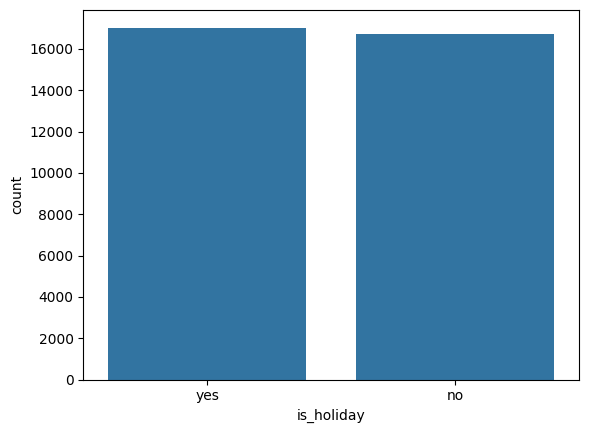

In [ ]:
sns.countplot(x='is_holiday',data=traffic1)
traffic1['is_holiday'].value_counts()

,is_holiday,traffic_volume
0,no,3254.897057
1,yes,3225.611731


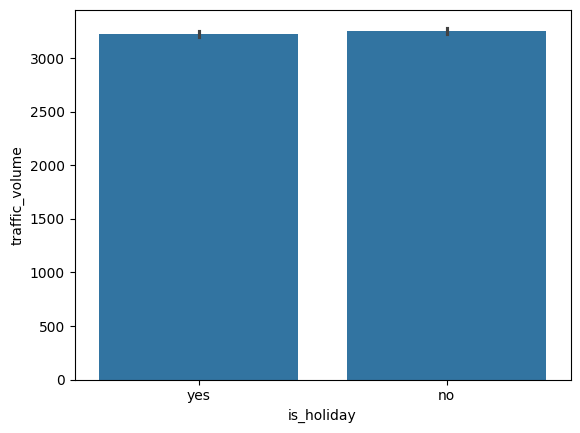

In [ ]:
sns.barplot(x='is_holiday',y='traffic_volume',data=traffic1)
traffic1.groupby('is_holiday',as_index=False).traffic_volume.mean()


In [ ]:
traffic1['weather_type'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

,count
weather_type,
Clouds,11213
Clear,9233
Mist,4047
Rain,3940
Snow,2070
Drizzle,1204
Haze,902
Fog,567
Thunderstorm,553


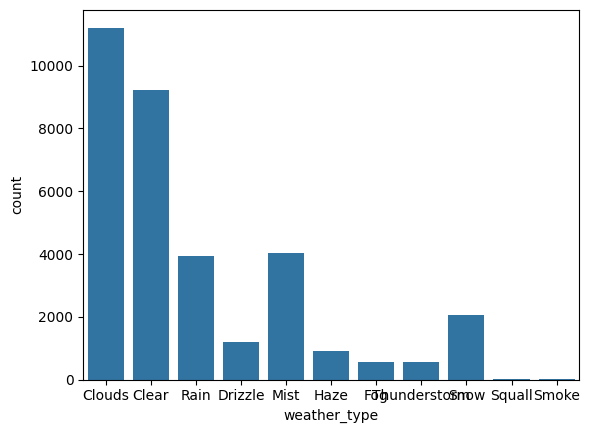

In [ ]:
sns.countplot(x='weather_type',data=traffic1)
traffic1['weather_type'].value_counts()

,weather_type,traffic_volume
0,Clear,3098.786202
1,Clouds,3504.287791
2,Drizzle,3201.309801
3,Fog,2740.603175
4,Haze,3638.919069
5,Mist,2943.952310
6,Rain,3289.209391
7,Smoke,2936.176471
8,Snow,3023.850725
9,Squall,2061.750000


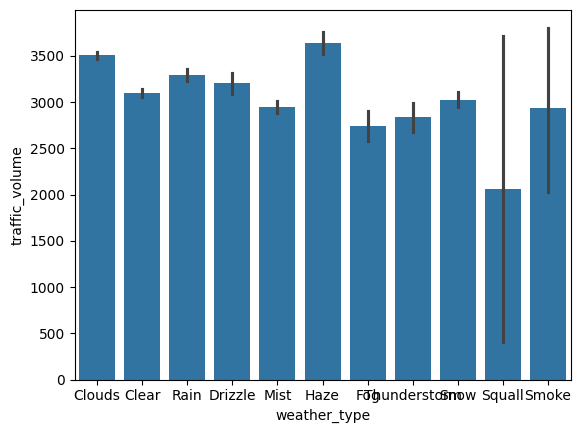

In [ ]:
sns.barplot(x='weather_type',y='traffic_volume',data=traffic1)
traffic.groupby('weather_type',as_index=False).traffic_volume.mean()

**Label Encding**

In [ ]:
from sklearn import preprocessing

encode=preprocessing.LabelEncoder()

traffic1['is_holiday']=encode.fit_transform(traffic1['is_holiday'])
traffic1['weather_type']=encode.fit_transform(traffic1['weather_type'])
traffic1.head()


<ipython-input-56-af6f6c7df913>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic1['is_holiday']=encode.fit_transform(traffic1['is_holiday'])
<ipython-input-56-af6f6c7df913>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic1['weather_type']=encode.fit_transform(traffic1['weather_type'])


,time,is_holiday,weather_type,traffic_volume
0,09:00:00,1,1,5545
1,10:00:00,0,1,4516
2,11:00:00,0,1,4767
3,12:00:00,0,1,5026
4,13:00:00,1,1,4918


In [ ]:
traffic1['time']=encode.fit_transform(traffic1['time'])
traffic1.head()

<ipython-input-57-7ac0f9cd9bca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic1['time']=encode.fit_transform(traffic1['time'])


,time,is_holiday,weather_type,traffic_volume
0,9,1,1,5545
1,10,0,1,4516
2,11,0,1,4767
3,12,0,1,5026
4,13,1,1,4918


In [ ]:
#Dataset info
traffic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   time            33750 non-null  int64
 1   is_holiday      33750 non-null  int64
 2   weather_type    33750 non-null  int64
 3   traffic_volume  33750 non-null  int64
dtypes: int64(4)
memory usage: 1.0 MB


<Axes: >

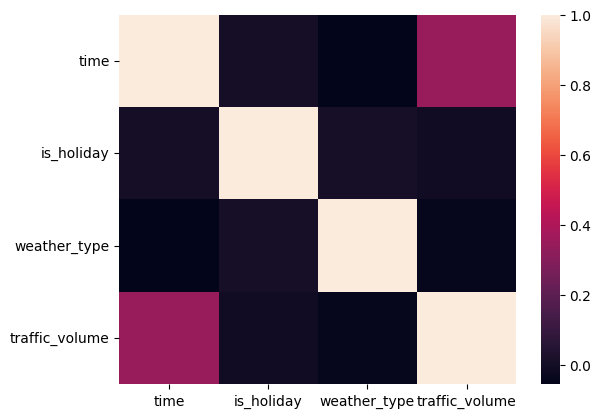

In [ ]:
#Correlation matrix
traffic1.corr()
sns.heatmap(traffic1.corr()annot=True)

**Spltiing data**

In [ ]:
traffic1_X=traffic1[['time','is_holiday','weather_type']]
traffic1_Y=traffic1['traffic_volume']

**Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(traffic1_X,traffic1_Y,test_size=0.25,random_state=25)


**Standardizing**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training Model**

Since Dependent variable have continuous values ,so iam  using Decision Tree Reggressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
traffic_DT=DecisionTreeRegressor()
traffic_DT.fit(X_train,y_train)

DecisionTreeRegressor()

**Predicting**

In [ ]:
y_pred=traffic_DT.predict(X_test)
traffic_predict=pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred})
traffic_predict.head()

,Actual Values,Predicted Values
14186,439,376.442424
27167,4922,4976.477477
27557,4382,4805.534722
3291,472,363.606061
10327,316,541.192308


In [ ]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R2 Score: {:.2f}'.format(metrics.r2_score(y_test,y_pred)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R2 Score: 77.44
Mean Absolute Error: 643.2035114837971
Mean Square Error: 902258.3048322932
Root Mean Square Error: 949.8727834990816
